### Image Clustering Using KMeans, Feature extraction with vgg16

In [2]:
# for loading/processing the images  
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

In [3]:
path = r"dataset/butterfly"
# change the working directory to the path where the images are located
# os.chdir(path)

In [40]:
# this list holds all the image filename
flowers = []
# maximum= 5
# temp= 0

for filename in os.listdir(path):
    # creates a ScandirIterator aliased as files
    f = os.path.join(path, filename)
    with os.scandir(f) as files:
        temp= 0
      # loops through each file in the directory
        for file in files:
#             if(temp<=maximum):
#                 temp+= 1
            if file.name.endswith('.jpg'):
              # adds only the image files to the flowers list
                flowers.append(f'{f}/{file.name}')
                print(file.name)

01.jpg
02.jpg
03.jpg
04.jpg
05.jpg
06.jpg
07.jpg
08.jpg
09.jpg
10.jpg
11.jpg
12.jpg
13.jpg
14.jpg
15.jpg
16.jpg
17.jpg
18.jpg
19.jpg
20.jpg
21.jpg
22.jpg
23.jpg
24.jpg
25.jpg
26.jpg
27.jpg
28.jpg
29.jpg
30.jpg
31.jpg
32.jpg
33.jpg
34.jpg
35.jpg
36.jpg
37.jpg
38.jpg
39.jpg
40.jpg
41.jpg
42.jpg
43.jpg
44.jpg
45.jpg
46.jpg
47.jpg
48.jpg
49.jpg
50.jpg
51.jpg
52.jpg
53.jpg
54.jpg
55.jpg
56.jpg
57.jpg
58.jpg
59.jpg
60.jpg
61.jpg
62.jpg
63.jpg
64.jpg
65.jpg
66.jpg
67.jpg
68.jpg
69.jpg
70.jpg
71.jpg
72.jpg
73.jpg
74.jpg
75.jpg
76.jpg
77.jpg
78.jpg
79.jpg
80.jpg
81.jpg
82.jpg
83.jpg
84.jpg
85.jpg
86.jpg
87.jpg
88.jpg
89.jpg
90.jpg
91.jpg
92.jpg
93.jpg
94.jpg
95.jpg
96.jpg
001.jpg
002.jpg
003.jpg
004.jpg
005.jpg
006.jpg
007.jpg
008.jpg
009.jpg
010.jpg
011.jpg
012.jpg
013.jpg
014.jpg
015.jpg
016.jpg
017.jpg
018.jpg
019.jpg
020.jpg
021.jpg
022.jpg
023.jpg
024.jpg
025.jpg
026.jpg
027.jpg
028.jpg
029.jpg
030.jpg
031.jpg
032.jpg
033.jpg
034.jpg
035.jpg
036.jpg
037.jpg
038.jpg
039.jpg
040.jpg
041.jpg


090.jpg
091.jpg
092.jpg
093.jpg
094.jpg
095.jpg
096.jpg
097.jpg
098.jpg
099.jpg
100.jpg
101.jpg
102.jpg
103.jpg
104.jpg
001.jpg
002.jpg
003.jpg
004.jpg
005.jpg
006.jpg
007.jpg
008.jpg
009.jpg
010.jpg
011.jpg
012.jpg
013.jpg
014.jpg
015.jpg
016.jpg
017.jpg
018.jpg
019.jpg
020.jpg
021.jpg
022.jpg
023.jpg
024.jpg
025.jpg
026.jpg
027.jpg
028.jpg
029.jpg
030.jpg
031.jpg
032.jpg
033.jpg
034.jpg
035.jpg
036.jpg
037.jpg
038.jpg
039.jpg
040.jpg
041.jpg
042.jpg
043.jpg
044.jpg
045.jpg
046.jpg
047.jpg
048.jpg
049.jpg
050.jpg
051.jpg
052.jpg
053.jpg
054.jpg
055.jpg
056.jpg
057.jpg
058.jpg
059.jpg
060.jpg
061.jpg
062.jpg
063.jpg
064.jpg
065.jpg
066.jpg
067.jpg
068.jpg
069.jpg
070.jpg
071.jpg
072.jpg
073.jpg
074.jpg
075.jpg
076.jpg
077.jpg
078.jpg
079.jpg
080.jpg
081.jpg
082.jpg
083.jpg
084.jpg
085.jpg
086.jpg
087.jpg
088.jpg
089.jpg
090.jpg
091.jpg
092.jpg
093.jpg
094.jpg
095.jpg
096.jpg
097.jpg
098.jpg
099.jpg
100.jpg
101.jpg
102.jpg
103.jpg
104.jpg
105.jpg
106.jpg
107.jpg
108.jpg
109.jpg
110.jpg


01.jpg
02.jpg
03.jpg
04.jpg
05.jpg
06.jpg
07.jpg
08.jpg
09.jpg
10.jpg
11.jpg
12.jpg
13.jpg
14.jpg
15.jpg
16.jpg
17.jpg
18.jpg
19.jpg
20.jpg
21.jpg
22.jpg
23.jpg
24.jpg
25.jpg
26.jpg
27.jpg
28.jpg
29.jpg
30.jpg
31.jpg
32.jpg
33.jpg
34.jpg
35.jpg
36.jpg
37.jpg
38.jpg
39.jpg
40.jpg
41.jpg
42.jpg
43.jpg
44.jpg
45.jpg
46.jpg
47.jpg
48.jpg
49.jpg
50.jpg
51.jpg
52.jpg
53.jpg
54.jpg
55.jpg
56.jpg
57.jpg
58.jpg
59.jpg
60.jpg
61.jpg
62.jpg
63.jpg
64.jpg
65.jpg
66.jpg
67.jpg
68.jpg
69.jpg
70.jpg
71.jpg
72.jpg
73.jpg
74.jpg
75.jpg
76.jpg
77.jpg
78.jpg
79.jpg
80.jpg
81.jpg
001.jpg
002.jpg
003.jpg
004.jpg
005.jpg
006.jpg
007.jpg
008.jpg
009.jpg
010.jpg
011.jpg
012.jpg
013.jpg
014.jpg
015.jpg
016.jpg
017.jpg
018.jpg
019.jpg
020.jpg
021.jpg
022.jpg
023.jpg
024.jpg
025.jpg
026.jpg
027.jpg
028.jpg
029.jpg
030.jpg
031.jpg
032.jpg
033.jpg
034.jpg
035.jpg
036.jpg
037.jpg
038.jpg
039.jpg
040.jpg
041.jpg
042.jpg
043.jpg
044.jpg
045.jpg
046.jpg
047.jpg
048.jpg
049.jpg
050.jpg
051.jpg
052.jpg
053.jpg
054.jpg
0

012.jpg
013.jpg
014.jpg
015.jpg
016.jpg
017.jpg
018.jpg
019.jpg
020.jpg
021.jpg
022.jpg
023.jpg
024.jpg
025.jpg
026.jpg
027.jpg
028.jpg
029.jpg
030.jpg
031.jpg
032.jpg
033.jpg
034.jpg
035.jpg
036.jpg
037.jpg
038.jpg
039.jpg
040.jpg
041.jpg
042.jpg
043.jpg
044.jpg
045.jpg
046.jpg
047.jpg
048.jpg
049.jpg
050.jpg
051.jpg
052.jpg
053.jpg
054.jpg
055.jpg
056.jpg
057.jpg
058.jpg
059.jpg
060.jpg
061.jpg
062.jpg
063.jpg
064.jpg
065.jpg
066.jpg
067.jpg
068.jpg
069.jpg
070.jpg
071.jpg
072.jpg
073.jpg
074.jpg
075.jpg
076.jpg
077.jpg
078.jpg
079.jpg
080.jpg
081.jpg
082.jpg
083.jpg
084.jpg
085.jpg
086.jpg
087.jpg
088.jpg
089.jpg
090.jpg
091.jpg
092.jpg
093.jpg
094.jpg
095.jpg
096.jpg
097.jpg
098.jpg
099.jpg
100.jpg
101.jpg
001.jpg
002.jpg
003.jpg
004.jpg
005.jpg
006.jpg
007.jpg
008.jpg
009.jpg
010.jpg
011.jpg
012.jpg
013.jpg
014.jpg
015.jpg
016.jpg
017.jpg
018.jpg
019.jpg
020.jpg
021.jpg
022.jpg
023.jpg
024.jpg
025.jpg
026.jpg
027.jpg
028.jpg
029.jpg
030.jpg
031.jpg
032.jpg
033.jpg
034.jpg
035.jpg


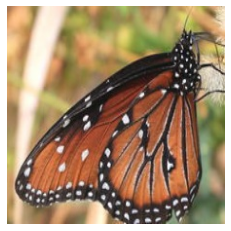

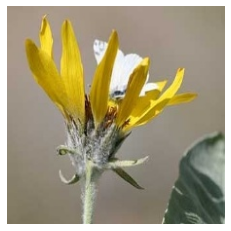

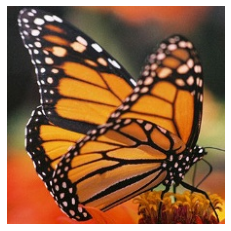

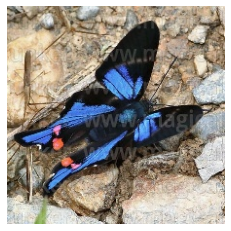

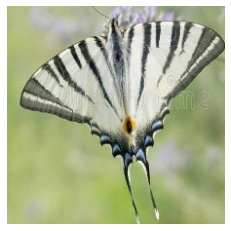

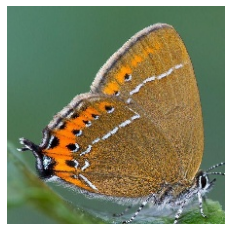

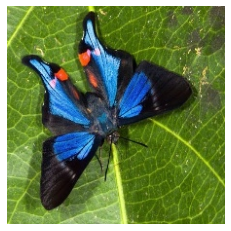

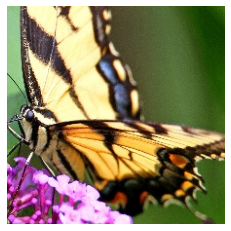

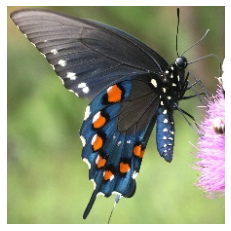

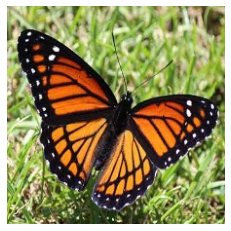

In [41]:
for i in range(10):
    random= np.random.randint(len(flowers))
    
    img = load_img(flowers[random])
    img = np.array(img)
    
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [42]:

for i in range(len(flowers)):
    flowers[i]= flowers[i].replace('\\', '/')

In [43]:
flowers

['dataset/butterfly/adonis/01.jpg',
 'dataset/butterfly/adonis/02.jpg',
 'dataset/butterfly/adonis/03.jpg',
 'dataset/butterfly/adonis/04.jpg',
 'dataset/butterfly/adonis/05.jpg',
 'dataset/butterfly/adonis/06.jpg',
 'dataset/butterfly/adonis/07.jpg',
 'dataset/butterfly/adonis/08.jpg',
 'dataset/butterfly/adonis/09.jpg',
 'dataset/butterfly/adonis/10.jpg',
 'dataset/butterfly/adonis/11.jpg',
 'dataset/butterfly/adonis/12.jpg',
 'dataset/butterfly/adonis/13.jpg',
 'dataset/butterfly/adonis/14.jpg',
 'dataset/butterfly/adonis/15.jpg',
 'dataset/butterfly/adonis/16.jpg',
 'dataset/butterfly/adonis/17.jpg',
 'dataset/butterfly/adonis/18.jpg',
 'dataset/butterfly/adonis/19.jpg',
 'dataset/butterfly/adonis/20.jpg',
 'dataset/butterfly/adonis/21.jpg',
 'dataset/butterfly/adonis/22.jpg',
 'dataset/butterfly/adonis/23.jpg',
 'dataset/butterfly/adonis/24.jpg',
 'dataset/butterfly/adonis/25.jpg',
 'dataset/butterfly/adonis/26.jpg',
 'dataset/butterfly/adonis/27.jpg',
 'dataset/butterfly/adonis/2

In [22]:
len(flowers)

300

In [44]:
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [10]:
extract_features(flowers[1], model)

array([[0.        , 5.46216   , 0.76910484, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [45]:
data = {}
p = r"dataset/butterfly.csv"
count= 0
# lop through each image in the dataset
for flower in flowers:
    print(count)
    count+= 1
    # try to extract the features and update the dictionary
    try:
        feat = extract_features(flower, model)
        data[flower] = feat
    # if something fails, save the extracted features as a pickle file (optional)
    except:
        print('error')
        


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699


In [46]:
temp_df= []
for i in data.values():
    temp_df.append(i.flatten())
    print(i.flatten())

[0.       0.       0.       ... 0.566671 0.       0.      ]
[0.         5.46216    0.76910484 ... 0.         0.         0.        ]
[0.        6.0067773 0.        ... 0.        0.        0.       ]
[0.      5.46371 0.      ... 0.      0.      0.     ]
[0.       6.946524 0.       ... 0.       0.       0.      ]
[0. 0. 0. ... 0. 0. 0.]
[0.         0.         0.65965915 ... 0.5251549  0.         0.        ]
[0.        0.5097016 0.        ... 0.        0.        0.       ]
[0.         7.654348   0.43275845 ... 0.         0.         0.        ]
[0.        1.7404423 0.        ... 0.        0.        0.       ]
[0.       8.863399 0.       ... 0.       0.       0.      ]
[0.       7.679083 0.       ... 0.       0.       0.      ]
[0.        1.2581403 0.        ... 0.        0.        0.       ]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0.        0.        0.        ... 1.1661601 0.        0.       ]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0.        0.5451524 0.        ... 0.   

[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0.        0.        0.        ... 3.4614224 0.        0.       ]
[0. 0. 0. ... 0. 0. 0.]
[0.        0.        0.        ... 1.9363363 0.        0.       ]
[0. 0. 0. ... 0. 0. 0.]
[0.         0.         0.         ... 0.29815173 0.         0.        ]
[0.        0.        0.        ... 2.7278986 0.        0.       ]
[0.         0.         0.         ... 0.43950558 0.         0.        ]
[0.        0.        0.        ... 0.8510847 0.        0.       ]
[0. 0. 0. ... 0. 0. 0.]
[0.        0.8812797 0.8311074 ... 0.        0.        0.       ]
[0.        0.        0.        ... 1.4679724 0.        0.       ]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0.         0.         0.         ... 0.22212195 0.         0.        ]
[0.         0.         0.         ... 0.16406125 0.         0.        ]
[0.         0.45287663 0.         ... 3.195105   0.         0.        ]
[0. 0. 0. ... 0. 0. 0.]
[0. 

[0.        0.        0.        ... 0.2668193 0.        0.       ]
[0.        1.4522437 0.        ... 0.        0.        0.       ]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0.        0.        0.        ... 4.1658416 0.        0.       ]
[0.         3.9093406  0.         ... 0.         0.11191952 0.        ]
[0.        0.        0.        ... 1.7605319 0.        0.       ]
[0.       0.503338 0.       ... 0.       0.       0.      ]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0.         0.28227383 0.         ... 0.         0.         0.        ]
[0.       0.       0.       ... 3.741336 0.       0.      ]
[0.        0.        0.        ... 0.        4.7488384 0.       ]
[0.       2.791932 0.       ... 0.       0.       0.      ]
[0.        1.3328341 0.        ... 0.        0.        0.       ]
[0.        2.1136312 0.        ... 0.8843495 0.        0.       ]
[0.        2.3252454 0.        ... 0.        0.        0.       ]
[0.         0.39788276 0.   

[0.         0.41276655 0.         ... 0.         0.         0.        ]
[0.        0.        0.        ... 2.3146045 0.        0.       ]
[0.         0.         0.05318993 ... 0.         0.7376481  0.        ]
[0.         0.42088878 0.         ... 0.         0.         0.        ]
[0.         0.         0.         ... 0.         0.12317806 0.        ]
[0.        0.        0.        ... 2.7971272 0.        0.       ]
[0.        2.590543  0.        ... 0.        1.1476831 0.       ]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0.5437121 0.        0.        ... 0.        0.        0.       ]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0.        0.7256071 0.        ... 0.        0.1935963 0.       ]
[0.        0.5275252 0.        ... 0.        0.        0.       ]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0.        1.3449237 0.        ... 0.        0.        0.       ]
[0. 0. 0. ... 0. 0. 0.]
[0.       

[0. 0. 0. ... 0. 0. 0.]
[0.         0.         0.         ... 0.07047874 0.         0.        ]
[0.         0.26455542 0.         ... 2.0368214  0.         0.        ]
[0.         0.         0.11055371 ... 0.         0.         0.        ]
[0.        0.        0.        ... 1.2228044 0.        0.       ]
[0.        0.        0.7833403 ... 0.945326  0.        0.       ]
[0.         0.         0.         ... 0.12196779 0.         0.        ]
[0.       0.       0.       ... 0.650425 0.       0.      ]
[0. 0. 0. ... 0. 0. 0.]
[0.         0.01619577 0.         ... 0.33823    0.         0.        ]
[0.         0.         0.73573256 ... 0.19854885 0.         0.85038185]
[0. 0. 0. ... 0. 0. 0.]
[0.       0.       0.       ... 3.611852 0.       0.      ]
[0.        0.        0.        ... 0.3103047 0.        0.       ]
[0.        0.        1.062604  ... 2.0080833 0.        0.       ]
[0. 0. 0. ... 0. 0. 0.]
[0.        0.        6.7992845 ... 0.        0.        0.       ]
[0. 0. 0. ... 0. 0. 0.

[0.      3.29294 0.      ... 0.      0.      0.     ]
[0. 0. 0. ... 0. 0. 0.]
[0.         0.71447885 0.         ... 0.         0.         0.        ]
[0.         0.76007545 0.         ... 0.         0.96045524 0.        ]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0.         0.2909904  0.         ... 0.         0.04746053 0.        ]
[0.        0.        0.        ... 3.0074034 0.        0.       ]
[0.         0.         0.         ... 0.         0.97668236 0.        ]
[0.        0.        0.        ... 1.3720037 0.        0.       ]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0.        4.0537786 0.        ... 0.        0.        0.       ]
[0.        0.        0.        ... 0.        1.8797448 0.       ]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0.        0.        0.        ... 0.        1.2325567 0.       ]
[0.        1.2000533 0.        ... 0.        0.        0.       ]
[0. 0. 0. ... 0. 0. 0.]
[0.        1.8092777 0.        ... 0.        3.1011274 0.       ]
[0. 

[0.       6.708057 0.       ... 0.       0.       0.      ]
[0.        4.5413356 0.        ... 0.        0.        0.       ]
[0.        1.1240803 0.        ... 0.        0.        0.       ]
[0.        1.8918896 0.        ... 0.        0.        0.       ]
[0.        0.6494445 0.        ... 0.        0.        0.       ]
[0. 0. 0. ... 0. 0. 0.]
[0.        1.1446356 0.        ... 0.        0.        0.       ]
[0.       7.387465 0.       ... 0.       0.       0.      ]
[0.       0.959021 0.       ... 0.       0.       0.      ]
[0.        7.9842587 0.        ... 0.        0.        0.       ]
[0.        2.5318918 0.        ... 0.        2.649321  0.       ]
[0.        5.6431804 0.        ... 0.        0.        0.       ]
[0.       1.194347 0.       ... 0.       0.       0.      ]
[0.        4.9241447 0.        ... 0.        0.        0.       ]
[0. 0. 0. ... 0. 0. 0.]
[0.        5.1291685 0.        ... 0.        0.        0.       ]
[0.       6.199339 0.       ... 0.       0.       0.

[0. 0. 0. ... 0. 0. 0.]
[0.         1.2657392  0.18996626 ... 0.         0.         0.        ]
[0. 0. 0. ... 0. 0. 0.]
[0.        3.2282543 0.        ... 0.        0.        0.       ]
[0. 0. 0. ... 0. 0. 0.]
[0.         1.5424736  0.01788199 ... 0.         0.         0.        ]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0.        0.        1.7032864 ... 0.        0.        0.       ]
[0. 0. 0. ... 0. 0. 0.]
[0.         0.97390366 0.         ... 0.         0.         0.        ]
[0.        3.1088603 0.        ... 0.        0.        0.       ]
[0. 0. 0. ... 0. 0. 0.]
[0.        1.7919056 0.        ... 0.        0.        0.       ]
[0. 0. 0. ... 0. 0. 0.]
[0.        1.4540797 0.        ... 0.        0.        0.       ]
[0.        0.        1.1177118 ... 0.        0.        0.       ]
[0.         0.45324928 0.         ... 0.         0.         0.        ]
[0.         0.45751545 0.         ... 0.         0.         0.        ]
[0. 0. 0. ... 0. 0. 0.]
[0.        2.4667566 0.     

In [46]:
data[flowers[0]].flatten()

array([0.      , 0.      , 0.      , ..., 0.566671, 0.      , 0.      ],
      dtype=float32)

In [13]:
pd.DataFrame(temp_df)

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.0,0.000000,0.000000,0.000000,3.325300,0.000000,0.0,0.000000,0.0,0.000000,...,2.082405,0.0,0.0,0.000000,0.0,0.0,3.563386,0.566671,0.0,0.0
1,0.0,5.462160,0.769105,0.000000,1.704685,0.000000,0.0,0.000000,0.0,0.000000,...,1.767772,0.0,0.0,0.000000,0.0,0.0,2.640470,0.000000,0.0,0.0
2,0.0,6.006777,0.000000,1.412704,4.747752,0.000000,0.0,0.000000,0.0,0.000000,...,6.780918,0.0,0.0,0.000000,0.0,0.0,2.454490,0.000000,0.0,0.0
3,0.0,5.463710,0.000000,0.000000,0.670178,0.000000,0.0,0.000000,0.0,0.000000,...,1.465192,0.0,0.0,0.000000,0.0,0.0,9.792593,0.000000,0.0,0.0
4,0.0,6.946524,0.000000,5.730507,0.570162,0.000000,0.0,0.000000,0.0,2.529137,...,4.509555,0.0,0.0,0.000000,0.0,0.0,2.467421,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.0,0.000000,0.000000,0.000000,0.806504,0.000000,0.0,2.469974,0.0,0.000000,...,4.432190,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
296,0.0,1.113589,0.000000,0.000000,0.000000,1.089725,0.0,0.000000,0.0,0.000000,...,4.349383,0.0,0.0,2.023483,0.0,0.0,0.000000,0.000000,0.0,0.0
297,0.0,0.000000,0.000000,0.000000,1.281446,0.000000,0.0,4.499420,0.0,3.028394,...,2.917199,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
298,0.0,0.000000,0.000000,0.000000,0.550030,0.000000,0.0,1.064466,0.0,0.000000,...,2.509619,0.0,0.0,2.146551,0.0,0.0,0.000000,0.000000,0.0,0.0


In [24]:
# get a list of the filenames
filenames = np.array(list(data.keys()))

# get a list of just the features
feat = np.array(list(data.values()))

# reshape so that there are 210 samples of 4096 vectors
feat = feat.reshape(-1,4096)


In [25]:
filenames

array(['dataset/butterfly/adonis/01.jpg',
       'dataset/butterfly/adonis/02.jpg',
       'dataset/butterfly/adonis/03.jpg',
       'dataset/butterfly/adonis/04.jpg',
       'dataset/butterfly/adonis/05.jpg',
       'dataset/butterfly/adonis/06.jpg',
       'dataset/butterfly/american snoot/001.jpg',
       'dataset/butterfly/american snoot/002.jpg',
       'dataset/butterfly/american snoot/003.jpg',
       'dataset/butterfly/american snoot/004.jpg',
       'dataset/butterfly/american snoot/005.jpg',
       'dataset/butterfly/american snoot/006.jpg',
       'dataset/butterfly/an 88/01.jpg', 'dataset/butterfly/an 88/02.jpg',
       'dataset/butterfly/an 88/03.jpg', 'dataset/butterfly/an 88/04.jpg',
       'dataset/butterfly/an 88/05.jpg', 'dataset/butterfly/an 88/06.jpg',
       'dataset/butterfly/banded peacock/01.jpg',
       'dataset/butterfly/banded peacock/02.jpg',
       'dataset/butterfly/banded peacock/03.jpg',
       'dataset/butterfly/banded peacock/04.jpg',
       'dataset/b

In [58]:
df.iloc[:,-1].value_counts()

0.000000    287
0.033962      1
2.427397      1
0.026471      1
0.108682      1
0.168905      1
0.434845      1
0.639480      1
0.729196      1
1.995232      1
1.442746      1
6.259723      1
1.132249      1
1.823923      1
Name: 4095, dtype: int64

In [47]:
df = pd.DataFrame(temp_df)
df.insert(0, 'img_path', flowers)

df

,img_path,0,1,2,3,4,5,6,7,8,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,dataset/butterfly/adonis/01.jpg,0.0,0.000000,0.000000,0.000000,3.325300,0.000000,0.000000,0.000000,0.0,...,2.082405,0.0,0.0,0.000000,0.0,0.0,3.563386,0.566671,0.0,0.0
1,dataset/butterfly/adonis/02.jpg,0.0,5.462160,0.769105,0.000000,1.704685,0.000000,0.000000,0.000000,0.0,...,1.767772,0.0,0.0,0.000000,0.0,0.0,2.640470,0.000000,0.0,0.0
2,dataset/butterfly/adonis/03.jpg,0.0,6.006777,0.000000,1.412704,4.747752,0.000000,0.000000,0.000000,0.0,...,6.780918,0.0,0.0,0.000000,0.0,0.0,2.454490,0.000000,0.0,0.0
3,dataset/butterfly/adonis/04.jpg,0.0,5.463710,0.000000,0.000000,0.670178,0.000000,0.000000,0.000000,0.0,...,1.465192,0.0,0.0,0.000000,0.0,0.0,9.792593,0.000000,0.0,0.0
4,dataset/butterfly/adonis/05.jpg,0.0,6.946524,0.000000,5.730507,0.570162,0.000000,0.000000,0.000000,0.0,...,4.509555,0.0,0.0,0.000000,0.0,0.0,2.467421,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4950,dataset/butterfly/zebra long wing/104.jpg,0.0,0.000000,0.000000,0.000000,2.724297,0.000000,0.000000,1.737869,0.0,...,8.606135,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
4951,dataset/butterfly/zebra long wing/105.jpg,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007929,0.0,...,4.492170,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
4952,dataset/butterfly/zebra long wing/106.jpg,0.0,0.024911,0.000000,0.000000,0.000000,0.000000,0.000000,0.923027,0.0,...,4.204838,0.0,0.0,0.367737,0.0,0.0,0.000000,0.000000,0.0,0.0
4953,dataset/butterfly/zebra long wing/107.jpg,0.0,2.015458,0.000000,0.000000,0.459019,0.000000,0.239911,0.000000,0.0,...,1.297822,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0


In [48]:
# reduce the amount of dimensions in the feature vector
pca = PCA(n_components=100, random_state=21)
df_new= pd.DataFrame(pca.fit_transform(df.drop('img_path', axis='columns')))
df_new.insert(0, 'img_path', flowers)

df_new

,img_path,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,dataset/butterfly/adonis/01.jpg,58.601822,37.474083,-9.913318,-28.029306,-22.705086,-2.214272,-21.785599,16.917892,-7.553226,...,3.033984,1.259209,0.099331,6.130583,2.732962,-3.793575,-5.832402,-4.514829,1.528197,1.228372
1,dataset/butterfly/adonis/02.jpg,44.410427,-21.799952,-14.983494,-5.666576,-40.108738,-29.472528,16.025248,7.763470,-2.386847,...,0.291029,0.209994,-7.263765,-1.127810,0.427937,-3.583910,-2.231630,5.615243,-5.294734,-2.872266
2,dataset/butterfly/adonis/03.jpg,64.821884,3.315180,-6.639502,-24.473066,-40.107990,-21.064186,9.169325,1.730524,8.187768,...,5.125059,1.217575,-0.711233,1.344913,0.012307,-0.674475,-1.587208,11.913065,5.044320,2.089163
3,dataset/butterfly/adonis/04.jpg,83.199890,8.115287,-25.019478,-14.678853,-50.178459,-17.834291,4.471576,20.415176,6.642881,...,-1.266088,1.324812,-1.497798,3.463223,-4.968039,1.776991,-0.076358,4.920141,-2.222674,4.508886
4,dataset/butterfly/adonis/05.jpg,33.519035,-9.674309,-15.597667,-9.728126,-20.951624,-17.922256,3.777114,5.720279,17.115965,...,2.317887,0.167698,-3.496362,-1.700000,-0.603119,-1.954707,0.600823,2.400947,-3.103528,1.005159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4950,dataset/butterfly/zebra long wing/104.jpg,-12.322034,-14.529588,14.644692,3.845632,-7.637845,-0.450008,24.544767,-2.974778,-5.003572,...,1.104742,1.914905,1.890690,0.239158,3.869868,0.940188,1.060896,0.433261,0.137729,-0.615711
4951,dataset/butterfly/zebra long wing/105.jpg,-20.859842,-18.913448,25.562492,8.283803,7.748413,8.609637,13.396943,0.079639,16.958033,...,1.745575,-0.003038,3.911172,-0.698462,1.005841,1.990614,-1.221333,-0.588700,-1.461741,5.466883
4952,dataset/butterfly/zebra long wing/106.jpg,-15.831889,-13.854627,19.266251,10.188392,9.381938,5.922412,21.139812,-12.737617,6.845314,...,-1.194990,-1.399888,0.465259,2.746650,3.230093,3.213196,2.450116,-3.282634,-3.379375,4.128096
4953,dataset/butterfly/zebra long wing/107.jpg,-30.226028,-18.011486,12.311292,9.713429,-1.703019,-1.427339,23.049046,-6.230620,10.938454,...,-3.657694,3.831002,0.562206,-0.729198,1.448067,1.971643,-0.584958,0.141027,-2.307331,-3.531411


In [21]:
img_path= df_new['img_path']
df_cluster= df_new.drop('img_path', axis='columns')

df_cluster

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-15.942329,65.711067,21.458424,28.976254,15.535246,1.077976,-25.378584,0.736411,-10.274586,-14.862835,...,0.063420,-2.843651,0.687740,-2.112342,2.484937,-0.709765,-0.935347,0.730012,4.756484,7.950850
1,-47.467953,24.494158,-18.515392,42.821198,-24.733139,-16.460466,14.575891,0.641986,-31.445721,8.940883,...,1.255986,0.207930,-2.162528,-4.537844,-4.453563,-0.440809,3.787942,3.569723,3.960597,2.448336
2,-44.986618,52.721722,5.732456,50.621368,-11.482329,-6.647528,13.434579,-9.288257,-22.100876,16.003439,...,-8.061763,-7.275539,-7.450626,2.302846,5.108308,-7.274333,0.144341,-4.254647,-1.338759,0.466151
3,-54.726547,75.037407,-5.120986,48.688507,-14.340006,-6.959129,1.603542,13.972762,-22.490158,4.936267,...,1.187415,-1.662893,6.700233,5.930147,-1.528791,5.214049,-0.588328,0.584173,-0.224965,-0.965832
4,-30.592516,23.607594,-11.664253,30.250645,-12.106781,-10.520408,4.428997,-5.843413,-8.996662,18.675299,...,5.387289,2.955431,4.952046,0.136314,-3.815164,0.080904,-5.952641,0.271193,0.354266,5.962605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.940705,-14.290884,3.047145,-3.154998,-17.971231,4.326236,0.997364,-12.766265,18.540958,-14.025110,...,5.286929,-0.129776,0.973925,-0.716275,2.913096,-1.618282,-0.965787,3.223662,1.535427,-1.895562
296,-1.254175,-19.492296,10.263241,-1.656789,-7.561630,2.684971,-1.999996,4.315320,17.158667,-6.156188,...,0.802541,-0.114236,-0.033887,1.697782,-3.566433,-0.086179,-1.097523,-0.289866,0.407959,-1.643025
297,5.869816,-25.081354,-10.417809,-2.452753,-19.018187,-2.655189,-2.683887,-1.349852,17.407181,-14.217913,...,1.465416,2.043193,-0.744386,-0.344418,0.500658,2.525322,1.276649,-1.426488,1.393601,-2.903793
298,1.218335,-18.909952,1.748977,-2.271977,-11.641456,-5.138483,7.680244,1.086455,2.982826,-20.780460,...,1.276217,0.585610,2.704206,0.238867,-1.104433,1.025861,-0.498958,-0.391785,-0.693823,-1.824537


In [26]:
# cluster feature vectors
kmeans = KMeans(n_clusters=50,n_jobs=-1, random_state=22)
kmeans.fit(df_cluster)

# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(img_path,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

c:\users\lenovo\pycharmprojects\data science\venv\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


In [39]:
groups

{48: ['dataset/butterfly/adonis/01.jpg'],
 36: ['dataset/butterfly/adonis/02.jpg',
  'dataset/butterfly/copper tail/002.jpg',
  'dataset/butterfly/copper tail/003.jpg'],
 47: ['dataset/butterfly/adonis/03.jpg'],
 31: ['dataset/butterfly/adonis/04.jpg', 'dataset/butterfly/adonis/06.jpg'],
 42: ['dataset/butterfly/adonis/05.jpg',
  'dataset/butterfly/american snoot/001.jpg',
  'dataset/butterfly/beckers white/001.jpg',
  'dataset/butterfly/beckers white/002.jpg',
  'dataset/butterfly/beckers white/004.jpg',
  'dataset/butterfly/beckers white/006.jpg',
  'dataset/butterfly/clodius parnassian/04.jpg',
  'dataset/butterfly/clodius parnassian/06.jpg',
  'dataset/butterfly/crimson patch/005.jpg',
  'dataset/butterfly/grey hairstreak/02.jpg',
  'dataset/butterfly/large marble/01.jpg',
  'dataset/butterfly/large marble/02.jpg',
  'dataset/butterfly/large marble/03.jpg',
  'dataset/butterfly/large marble/04.jpg',
  'dataset/butterfly/large marble/05.jpg',
  'dataset/butterfly/large marble/06.jpg

In [27]:
# function that lets you view a cluster (based on identifier)        
def view_cluster(cluster):
    plt.figure(figsize = (25,25));
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to 30 images to be shown at a time
    if len(files) > 30:
        print(f"Clipping cluster size from {len(files)} to 30")
        files = files[:29]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')

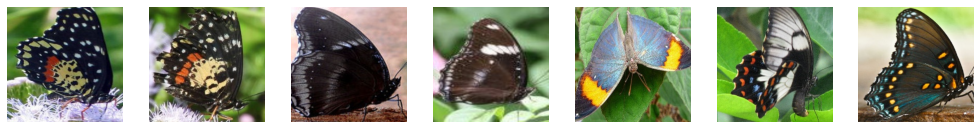

In [29]:
view_cluster(30)

c:\users\lenovo\pycharmprojects\data science\venv\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\lenovo\pycharmprojects\data science\venv\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\lenovo\pycharmprojects\data science\venv\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\lenovo\pycharmprojects\data science\venv\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (rena

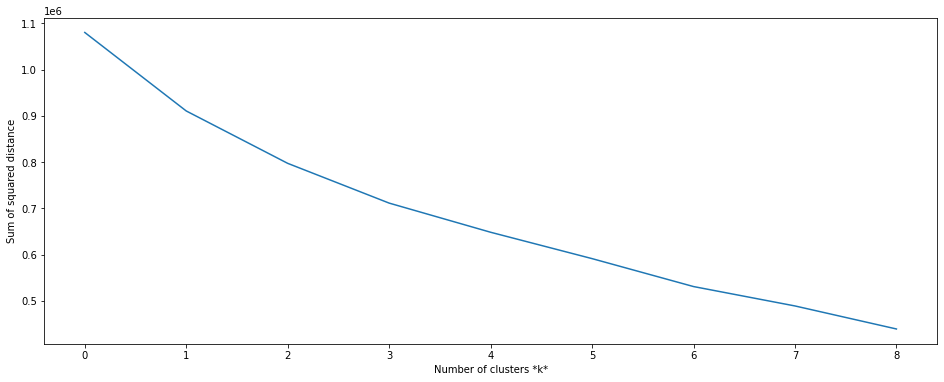

In [78]:
# this is just incase you want to see which value for k might be the best 
sse = []

list_k = list(range(0,9))

for k in range(10,100,10):
    km = KMeans(n_clusters=k, random_state=22, n_jobs=-1)
    km.fit(x)
    
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(16, 6))
plt.plot(list_k, sse)
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [36]:
df_new

,img_path,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,dataset/butterfly/adonis/01.jpg,-15.942329,65.711067,21.458424,28.976254,15.535246,1.077976,-25.378584,0.736411,-10.274586,...,0.063420,-2.843651,0.687740,-2.112342,2.484937,-0.709765,-0.935347,0.730012,4.756484,7.950850
1,dataset/butterfly/adonis/02.jpg,-47.467953,24.494158,-18.515392,42.821198,-24.733139,-16.460466,14.575891,0.641986,-31.445721,...,1.255986,0.207930,-2.162528,-4.537844,-4.453563,-0.440809,3.787942,3.569723,3.960597,2.448336
2,dataset/butterfly/adonis/03.jpg,-44.986618,52.721722,5.732456,50.621368,-11.482329,-6.647528,13.434579,-9.288257,-22.100876,...,-8.061763,-7.275539,-7.450626,2.302846,5.108308,-7.274333,0.144341,-4.254647,-1.338759,0.466151
3,dataset/butterfly/adonis/04.jpg,-54.726547,75.037407,-5.120986,48.688507,-14.340006,-6.959129,1.603542,13.972762,-22.490158,...,1.187415,-1.662893,6.700233,5.930147,-1.528791,5.214049,-0.588328,0.584173,-0.224965,-0.965832
4,dataset/butterfly/adonis/05.jpg,-30.592516,23.607594,-11.664253,30.250645,-12.106781,-10.520408,4.428997,-5.843413,-8.996662,...,5.387289,2.955431,4.952046,0.136314,-3.815164,0.080904,-5.952641,0.271193,0.354266,5.962605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,dataset/butterfly/zebra long wing/002.jpg,0.940705,-14.290884,3.047145,-3.154998,-17.971231,4.326236,0.997364,-12.766265,18.540958,...,5.286929,-0.129776,0.973925,-0.716275,2.913096,-1.618282,-0.965787,3.223662,1.535427,-1.895562
296,dataset/butterfly/zebra long wing/003.jpg,-1.254175,-19.492296,10.263241,-1.656789,-7.561630,2.684971,-1.999996,4.315320,17.158667,...,0.802541,-0.114236,-0.033887,1.697782,-3.566433,-0.086179,-1.097523,-0.289866,0.407959,-1.643025
297,dataset/butterfly/zebra long wing/004.jpg,5.869816,-25.081354,-10.417809,-2.452753,-19.018187,-2.655189,-2.683887,-1.349852,17.407181,...,1.465416,2.043193,-0.744386,-0.344418,0.500658,2.525322,1.276649,-1.426488,1.393601,-2.903793
298,dataset/butterfly/zebra long wing/005.jpg,1.218335,-18.909952,1.748977,-2.271977,-11.641456,-5.138483,7.680244,1.086455,2.982826,...,1.276217,0.585610,2.704206,0.238867,-1.104433,1.025861,-0.498958,-0.391785,-0.693823,-1.824537


In [49]:
df.to_csv('dataset/butterfly.csv', index= None)

In [84]:
pd.read_csv('butterfly.csv')

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.0,0.000000,0.000000,0.000000,3.325300,0.000000,0.0,0.000000,0.0,0.000000,...,2.082405,0.0,0.0,0.000000,0.0,0.0,3.563386,0.566671,0.0,0.0
1,0.0,5.462160,0.769105,0.000000,1.704685,0.000000,0.0,0.000000,0.0,0.000000,...,1.767772,0.0,0.0,0.000000,0.0,0.0,2.640470,0.000000,0.0,0.0
2,0.0,6.006777,0.000000,1.412704,4.747752,0.000000,0.0,0.000000,0.0,0.000000,...,6.780918,0.0,0.0,0.000000,0.0,0.0,2.454490,0.000000,0.0,0.0
3,0.0,5.463710,0.000000,0.000000,0.670178,0.000000,0.0,0.000000,0.0,0.000000,...,1.465192,0.0,0.0,0.000000,0.0,0.0,9.792593,0.000000,0.0,0.0
4,0.0,6.946524,0.000000,5.730507,0.570162,0.000000,0.0,0.000000,0.0,2.529137,...,4.509555,0.0,0.0,0.000000,0.0,0.0,2.467421,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.0,0.000000,0.000000,0.000000,0.806504,0.000000,0.0,2.469974,0.0,0.000000,...,4.432190,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
296,0.0,1.113589,0.000000,0.000000,0.000000,1.089725,0.0,0.000000,0.0,0.000000,...,4.349383,0.0,0.0,2.023483,0.0,0.0,0.000000,0.000000,0.0,0.0
297,0.0,0.000000,0.000000,0.000000,1.281446,0.000000,0.0,4.499420,0.0,3.028393,...,2.917199,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
298,0.0,0.000000,0.000000,0.000000,0.550030,0.000000,0.0,1.064466,0.0,0.000000,...,2.509619,0.0,0.0,2.146551,0.0,0.0,0.000000,0.000000,0.0,0.0


In [30]:
from skimage.io import imread

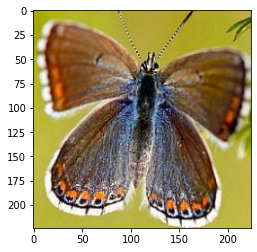

In [34]:
a= imread(df_new['img_path'][0])

plt.imshow(a)

In [32]:
df_new['img_path'][0]

'dataset/butterfly/adonis/01.jpg'